<a href="https://colab.research.google.com/github/Paolo20224/ProjectZero/blob/main/Test_2doExamen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Como parte inicial, descargamos la informacion y la cargamos en nuestro cuader en Colab
import pandas as pd
filename = "/content/Maternal Health Risk Data Set.csv"
df = pd.read_csv(filename)

1.Exploración y depuración de datos

In [2]:
# A continuacion revisaremos aquellos datos nulos para ver la integridad de la informacion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [3]:
# Revisaremos los primero diez datos para dimensionar la magnitud de la info
df.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [4]:
# Si bien es cierto más del 50% de la data se encuentra duplicada, no existe un identificador que permita asumir que cada valor es unico (ej Rut o ID), sin embargo tambien es posible asumir que es muy poco probable que se repitan datos de 7 columnas, por lo que a modo de un approach conservador eliminaremos los datos duplicados.
duplicados = df.duplicated()
duplicados.sum()

562

In [5]:
df2=df
df2 = df2.drop_duplicates()
df2.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,29.194690,110.553097,75.418142,8.346173,98.692478,73.949115
std,13.767379,17.872282,13.754578,2.829209,1.410897,8.156973
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,90.000000,65.000000,6.900000,98.000000,70.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,35.000000,120.000000,86.000000,7.900000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [6]:
#Con nuestro DF ya depurado de elementos duplicados y nulos prodeceremos a revisar si nuestra variable objeto puede ser transformada en variable cuantitativa.
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 705
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          452 non-null    int64  
 1   SystolicBP   452 non-null    int64  
 2   DiastolicBP  452 non-null    int64  
 3   BS           452 non-null    float64
 4   BodyTemp     452 non-null    float64
 5   HeartRate    452 non-null    int64  
 6   RiskLevel    452 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 28.2+ KB


In [7]:
df2.groupby(['RiskLevel'])[['RiskLevel']].count()

,RiskLevel
RiskLevel,
high risk,112
low risk,234
mid risk,106


In [8]:
df3=df2
df3['RiskLevel'] = df3['RiskLevel'].replace("high risk",3)
df3['RiskLevel'] = df3['RiskLevel'].replace("mid risk",2)
df3['RiskLevel'] = df3['RiskLevel'].replace("low risk",1)
df3.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,29.194690,110.553097,75.418142,8.346173,98.692478,73.949115,1.730088
std,13.767379,17.872282,13.754578,2.829209,1.410897,8.156973,0.833169
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,1.000000
25%,19.000000,90.000000,65.000000,6.900000,98.000000,70.000000,1.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,35.000000,120.000000,86.000000,7.900000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,3.000000


2. Visualización y navegacion de dataframe

In [9]:
#A continuacion analizamos la correlacion entra las variables cuantitativas (incluyendo la modificacion de nuestro nivel de riesgo).
import pandas as pd
corr_df = df3.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.375931,0.347846,0.376616,-0.188843,0.077407,0.183010
SystolicBP,0.375931,1.000000,0.790002,0.347534,-0.207267,-0.006088,0.327365
DiastolicBP,0.347846,0.790002,1.000000,0.300423,-0.201992,-0.016470,0.254239
BS,0.376616,0.347534,0.300423,1.000000,-0.042511,0.135605,0.548888
BodyTemp,-0.188843,-0.207267,-0.201992,-0.042511,1.000000,0.087262,0.259701
HeartRate,0.077407,-0.006088,-0.016470,0.135605,0.087262,1.000000,0.183289
RiskLevel,0.183010,0.327365,0.254239,0.548888,0.259701,0.183289,1.000000


Composicion de Riesgo: Inicialmente evaluaremos como se encuestran compuestos los distintos niveles de riesgo.

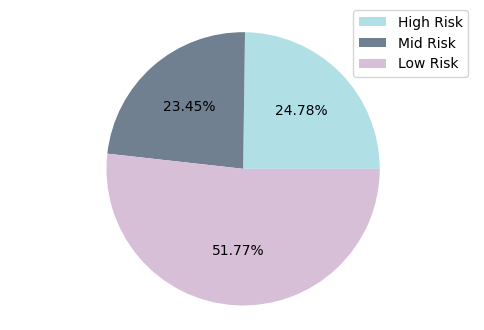

In [10]:
import matplotlib.pyplot as plt

fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1) 

size = [112,106,234]
etiquetas = ["High Risk","Mid Risk","Low Risk"]
colores=["powderblue","slategrey","thistle"]

ax1.pie(size, autopct="%.2f%%", shadow = False, startangle=0, colors=colores)
ax1.legend(bbox_to_anchor=(1, 1.05), loc='upper right', labels= etiquetas)

ax1.axis("equal")

plt.show()

A continuacion procederemos a graficar cada una de las variables que tenian el mayor nivel de correlacion con respecto a nuestro "Nivel de Riesgo".

<function matplotlib.pyplot.show(*args, **kw)>

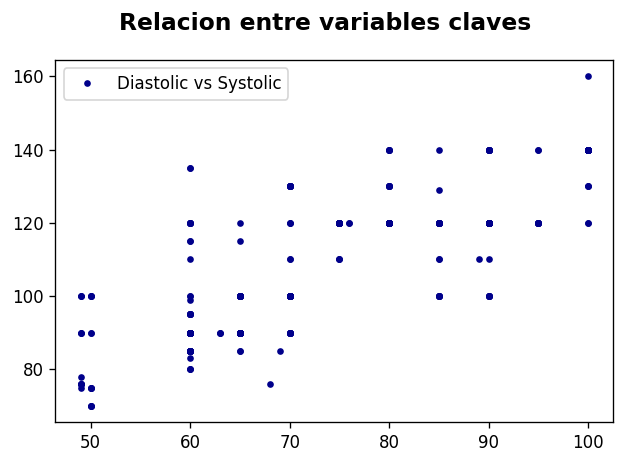

In [13]:
import matplotlib.pyplot as plt

plt.figure(dpi = 120)
plt.suptitle("Relacion entre variables claves", fontsize=14, fontweight="bold",color = "black" )

plt.plot(df3["DiastolicBP"],df3["SystolicBP"],'.', label= "Diastolic vs Systolic" , color = "darkblue",)
plt.xticks(rotation=0, size=10)
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

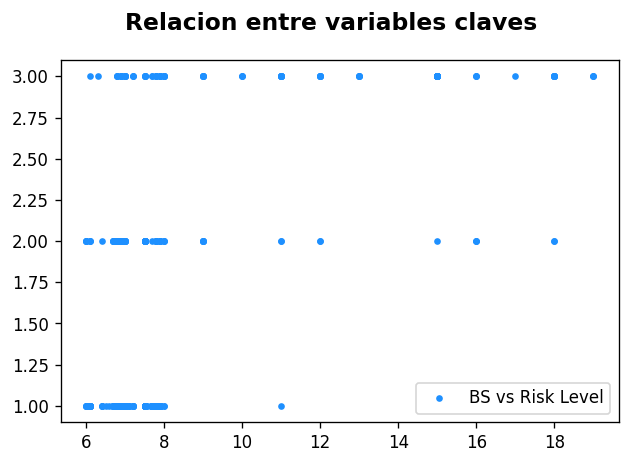

In [15]:
import matplotlib.pyplot as plt

plt.figure(dpi = 120)
plt.suptitle("Relacion entre variables claves", fontsize=14, fontweight="bold",color = "black" )

plt.plot(df3["BS"],df3["RiskLevel"],'.', label= "BS vs Risk Level" , color = "dodgerblue",)
plt.xticks(rotation=0, size=10)
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

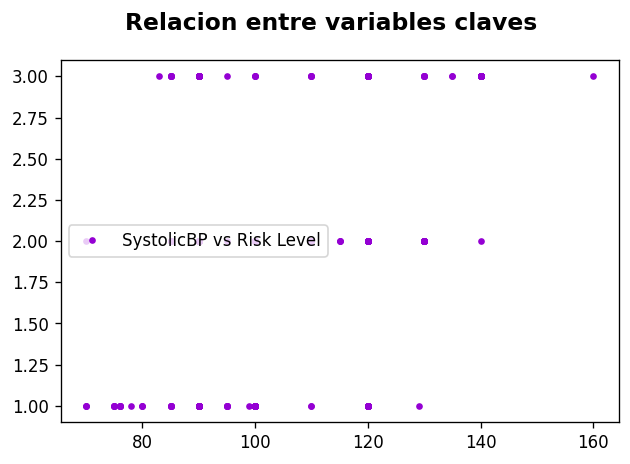

In [16]:
import matplotlib.pyplot as plt

plt.figure(dpi = 120)
plt.suptitle("Relacion entre variables claves", fontsize=14, fontweight="bold",color = "black" )

plt.plot(df3["SystolicBP"],df3["RiskLevel"],'.', label= "SystolicBP vs Risk Level" , color = "darkviolet",)
plt.xticks(rotation=0, size=10)
plt.legend()
plt.show

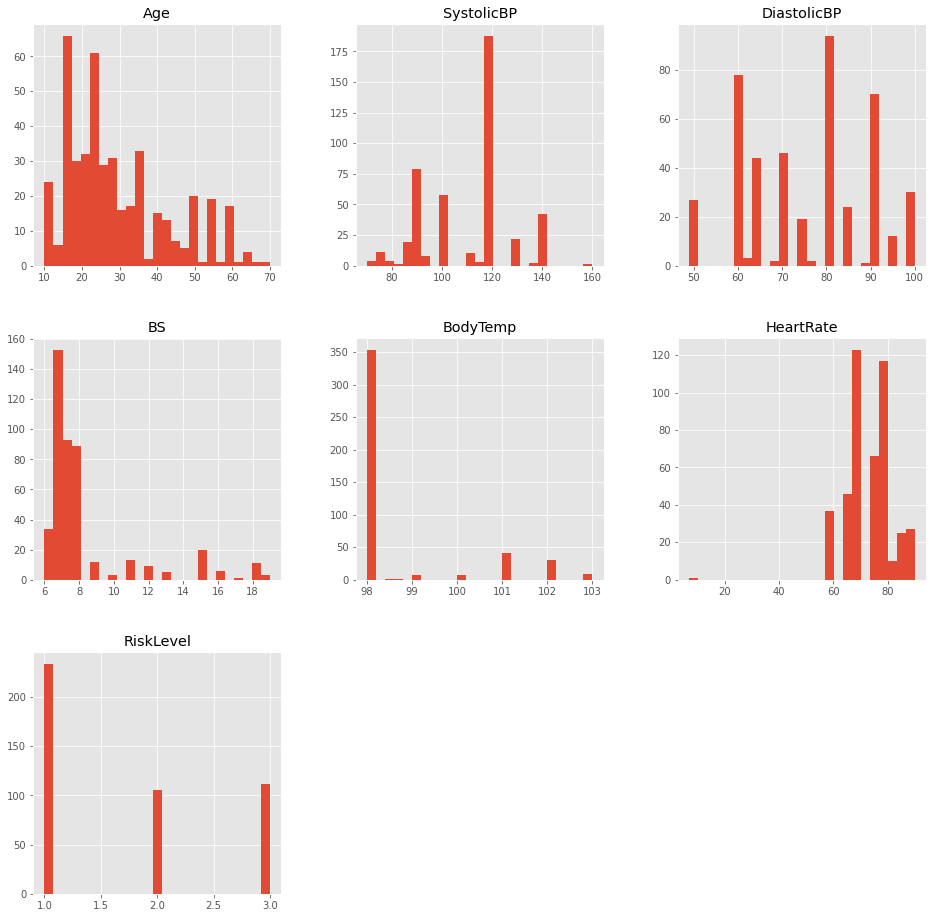

In [42]:
df3.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=0);

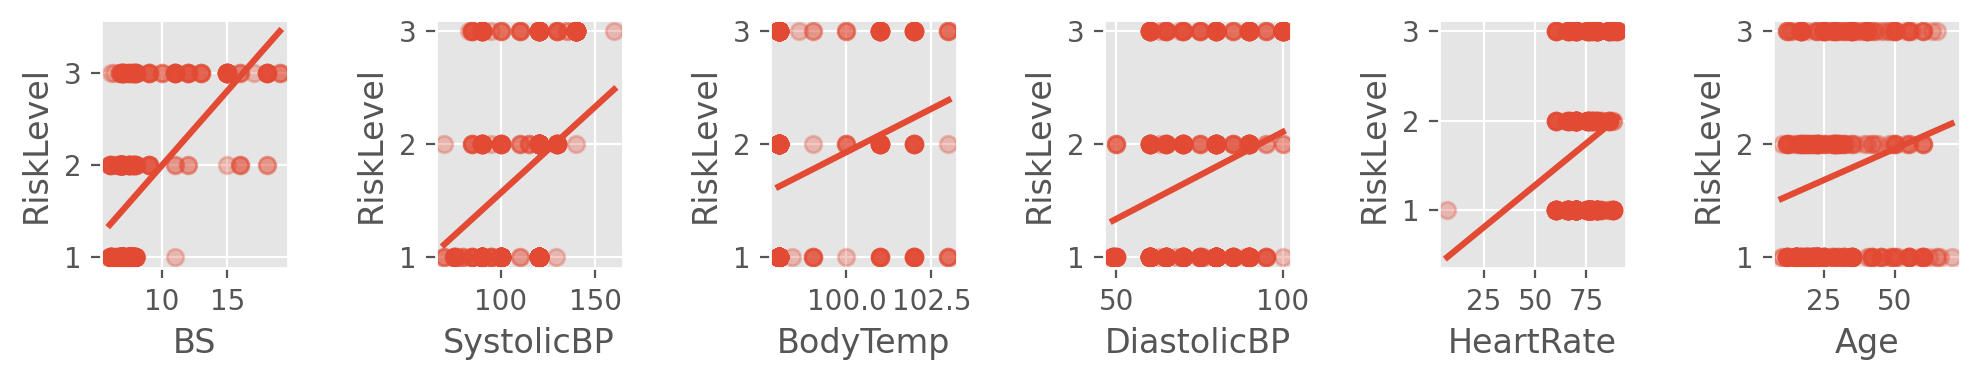

In [55]:
import seaborn as sns

fig, axes = plt.subplots(nrows = 1,ncols = 6,figsize = (10,2), dpi=200)
sns.regplot(x='BS', y='RiskLevel', data=df3, ci=None, ax = axes[0], scatter_kws={'alpha':0.3});
sns.regplot(x='SystolicBP', y='RiskLevel', data=df3, ci=None, ax = axes[1], scatter_kws={'alpha':0.3});
sns.regplot(x='BodyTemp', y='RiskLevel', data=df3, ci=None, ax = axes[2], scatter_kws={'alpha':0.3});
sns.regplot(x='DiastolicBP', y='RiskLevel', data=df3, ci=None, ax = axes[3], scatter_kws={'alpha':0.3});
sns.regplot(x='HeartRate', y='RiskLevel', data=df3, ci=None, ax = axes[4], scatter_kws={'alpha':0.3});
sns.regplot(x='Age', y='RiskLevel', data=df3, ci=None, ax = axes[5], scatter_kws={'alpha':0.3});
fig.tight_layout()

1. Creacion y Optimizacion de Modelo Predictivo

A) KNN

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb


%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.exceptions import NotFittedError

Preparamos el dataset

In [25]:
# Las variables objeto de prediccion fueron elegidas en funcion de su correlacion con la variable a predecir.
X = df3[['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']].values
y = df3['RiskLevel'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=123)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Creamos el Modelo

In [26]:
#Realizamos iteraciones para "N° de vecinos" y nos quedamos con el mejor equilibrio para el nivel de precision de test y entrenamiento.

n_neighbors = 90

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train,y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.61
Accuracy of K-NN classifier on test set: 0.58


B) Arbol de Decision

In [29]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

In [30]:
# Las variables objeto de prediccion fueron elegidas en funcion de su correlacion con la variable a predecir.
X = df3[['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']].values
y = df3['RiskLevel'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=123)

tree_clf = DecisionTreeClassifier(max_depth=50)
tree_clf.fit(X_train, y_train)
# Visualizando árbol de decisión
# Nueva instancia
# CALCULAMOS LAS Probabilidades por cada clase
print(tree_clf.predict_proba(X_test))
# Clase predicha
pred=tree_clf.predict(X_test)
print("Esta instancia pertenece a la clase",tree_clf.predict(X_test))

[[1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.5 0.5 0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.5 0.5 0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.5 0.5 0. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  1.  

In [31]:
pred = tree_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[57  9  4]
 [18 12 11]
 [ 2  5 18]]
              precision    recall  f1-score   support

           1       0.74      0.81      0.78        70
           2       0.46      0.29      0.36        41
           3       0.55      0.72      0.62        25

    accuracy                           0.64       136
   macro avg       0.58      0.61      0.58       136
weighted avg       0.62      0.64      0.62       136



C) Random Forests

In [32]:
from sklearn.ensemble import RandomForestClassifier

rndf_clf = RandomForestClassifier(n_estimators=20)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_test)

pred = rndf_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

rndf_clf.score(X_test, y_test)

[[61  5  4]
 [23 11  7]
 [ 2  7 16]]
              precision    recall  f1-score   support

           1       0.71      0.87      0.78        70
           2       0.48      0.27      0.34        41
           3       0.59      0.64      0.62        25

    accuracy                           0.65       136
   macro avg       0.59      0.59      0.58       136
weighted avg       0.62      0.65      0.62       136



0.6470588235294118

D) Regresion Logistica

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Entrenamiento regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [34]:
y_pred = log_reg.predict(X_test)

pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

log_reg.score(X_test, y_test)

[[68  0  2]
 [36  1  4]
 [10  1 14]]
              precision    recall  f1-score   support

           1       0.60      0.97      0.74        70
           2       0.50      0.02      0.05        41
           3       0.70      0.56      0.62        25

    accuracy                           0.61       136
   macro avg       0.60      0.52      0.47       136
weighted avg       0.59      0.61      0.51       136



0.6102941176470589